# Assignment 6: <h1><center> SỬA MÉO TRÊN ẢNH </center></h1>

Thư mục chessboard và thư mục scenes chứa các ảnh thu nhận được từ cùng 1 camera. Hãy:
- sử dụng các ảnh được cung cấp trong thư mục chessboard để tìm tham số cần thiết và
- chỉnh méo của các ảnh trong thư mục scenes thu được bởi camera này.

## Hiệu chỉnh camera

In [23]:
# Các thư viện cần thiết
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import math

## Chuẩn bị các thông số cần thiết
## YOUR CODE HERE

# chessboard dimension (12 x 8) however we need objpoints and imgpoints to have same number of entries and of same size
# Kích thước của bàn cờ (12x8) tuy nhiên chúng ta cần objpoints và impoints có cùng chỉ mục và kích thước
cbrow = 11
cbcolumn = 7
objp = np.zeros((cbrow*cbcolumn,3), np.float32)
objp[:,:2] = np.mgrid[0:cbcolumn,0:cbrow].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

## Đọc ảnh từ thư mục
images = glob.glob('images/*.jpg')

## Duyệt qua từng ảnh
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ## Tìm các góc của bàn cờ
    ret, corners = cv2.findChessboardCorners(gray, (cbcolumn,cbrow), None)

    ## Nếu tìm thấy góc
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        ## Vẽ lên ảnh
        img = cv2.drawChessboardCorners(img, (cbcolumn,cbrow), corners, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()


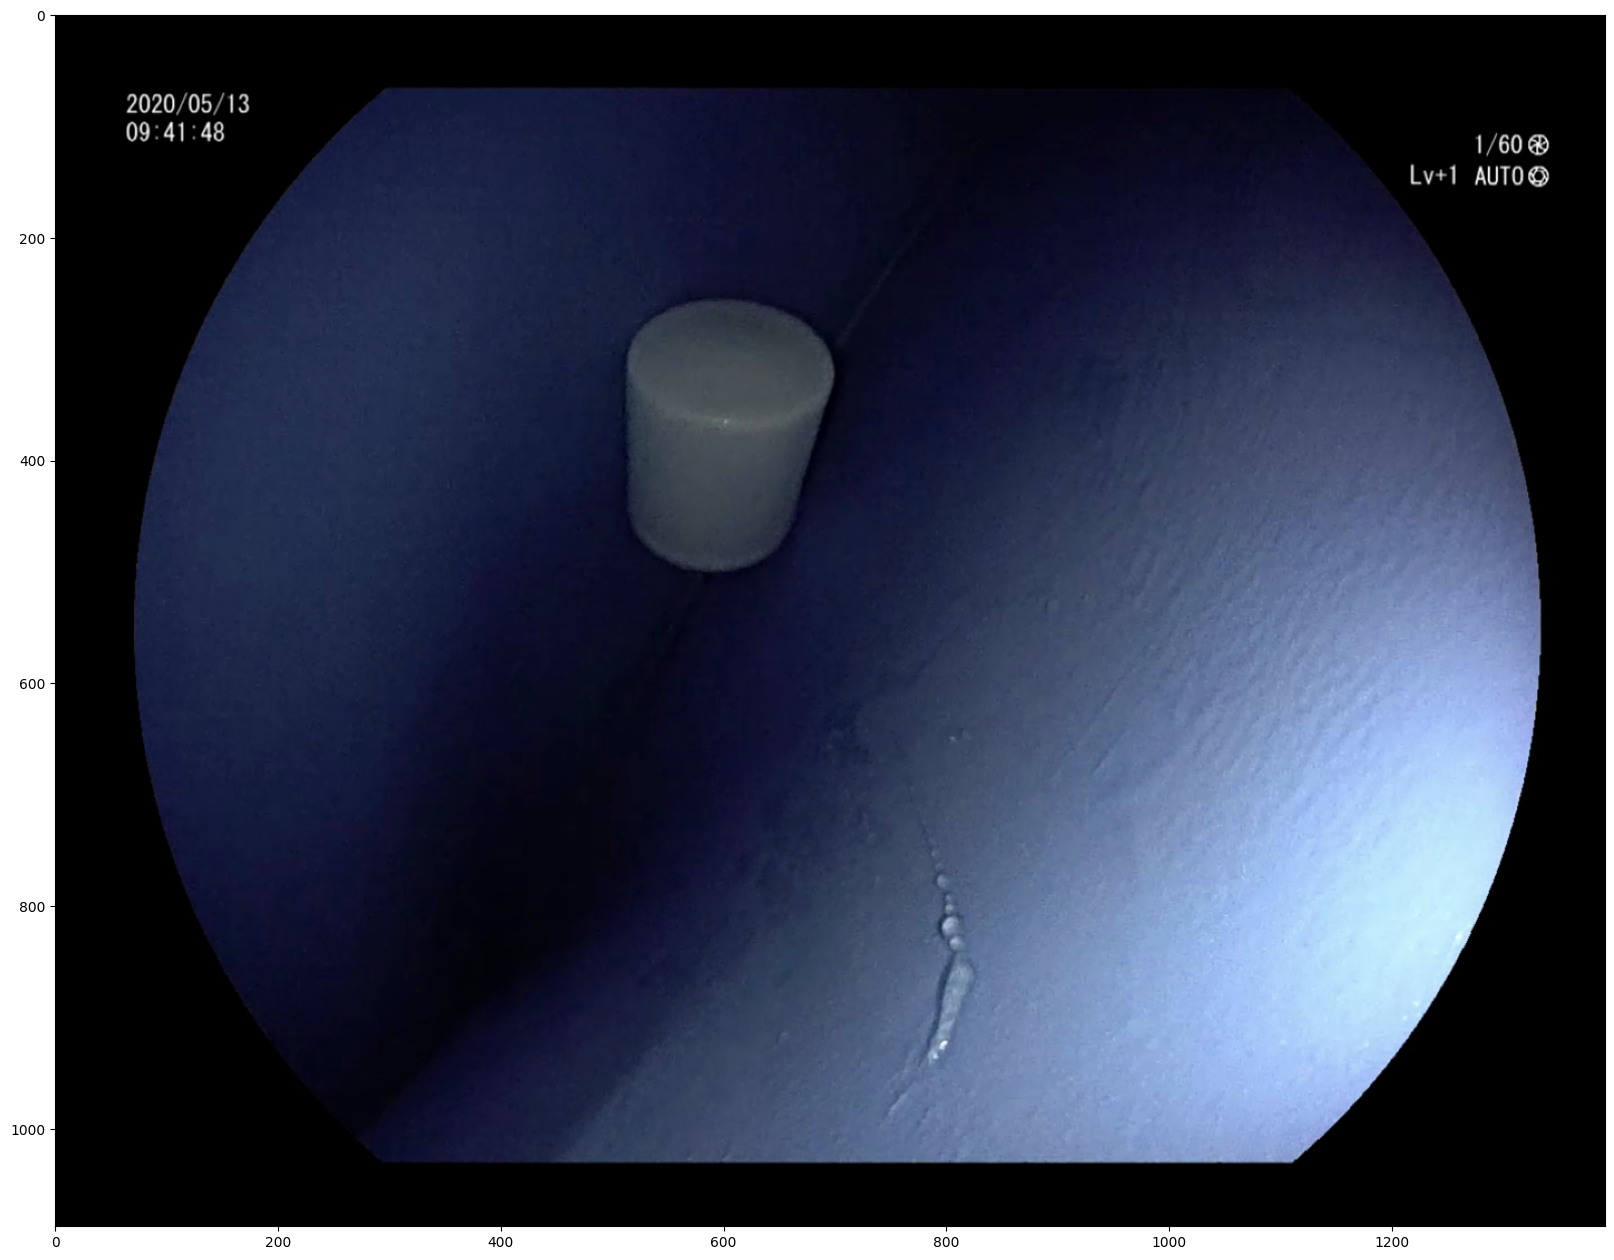

In [26]:

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

In [36]:
## Tìm tham số camera
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

## Hiển thị ảnh đã được nén
for fname in images:

    img = cv2.imread(fname)
    h,  w = img.shape[:2]
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

    ## undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    print(dst)

    ## crop the image
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    cv2.imshow('img', dst)
    cv2.waitKey(500)

In [42]:
# camera matrix
mtx

NameError: name 'mtx' is not defined

## Sửa méo ảnh thu được từ camera với tham số đã tìm được


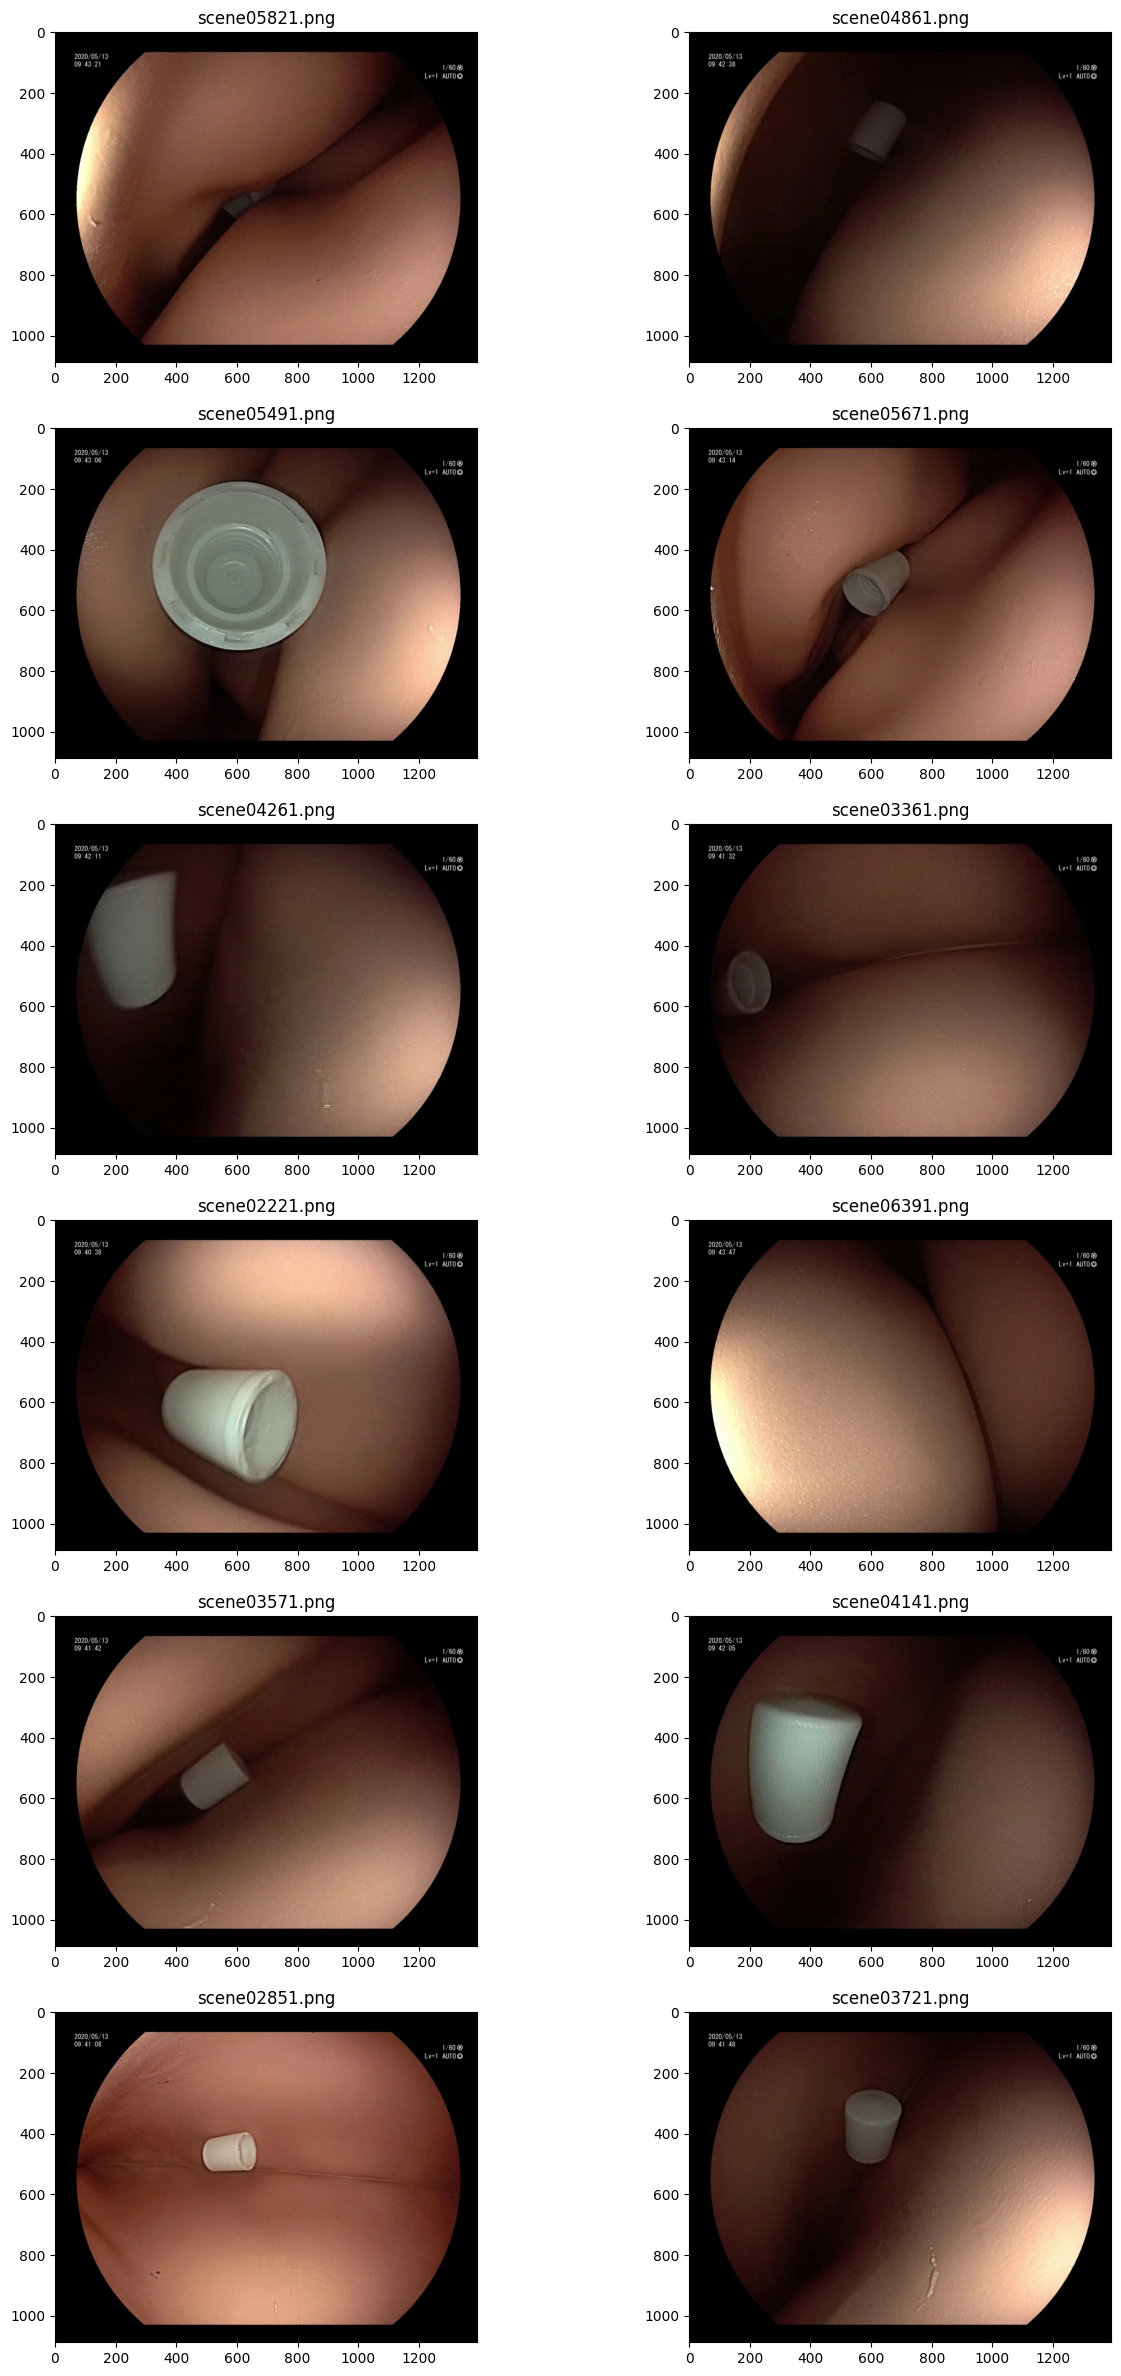

In [15]:
images=glob.glob('scenes/*.png')
column=2
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(15,30))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))

plt.show()

## Thực hiện hiệu chỉnh

In [16]:
##### Hiệu chỉnh và ghi kết quả ra thư mực riêng #####
### YOUR CODE HERE
img1 = cv2.imread('scenes/scene02851.png')
h, w = img1.shape[:2]

# tìm tham số trong camera

newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))



resultImg = glob.glob('scenes/*.png')
for rimg in resultImg:
    img = cv2.imread(rimg)
    
    # undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)


    
    # Ghi ản kết quả
    cv2.imwrite('result/'+os.path.basename(rimg), dst)
    cv2.imshow('result', dst)
    cv2.waitKey(500)
cv2.destroyAllWindows()
####################

###########################################

# Lỗi phép chiếu (re-projection error)
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(
        objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print("total error", mean_error/len(objpoints))

#cv2.waitKey(0)
#cv2.destroyAllWindows()

NameError: name 'mtx' is not defined

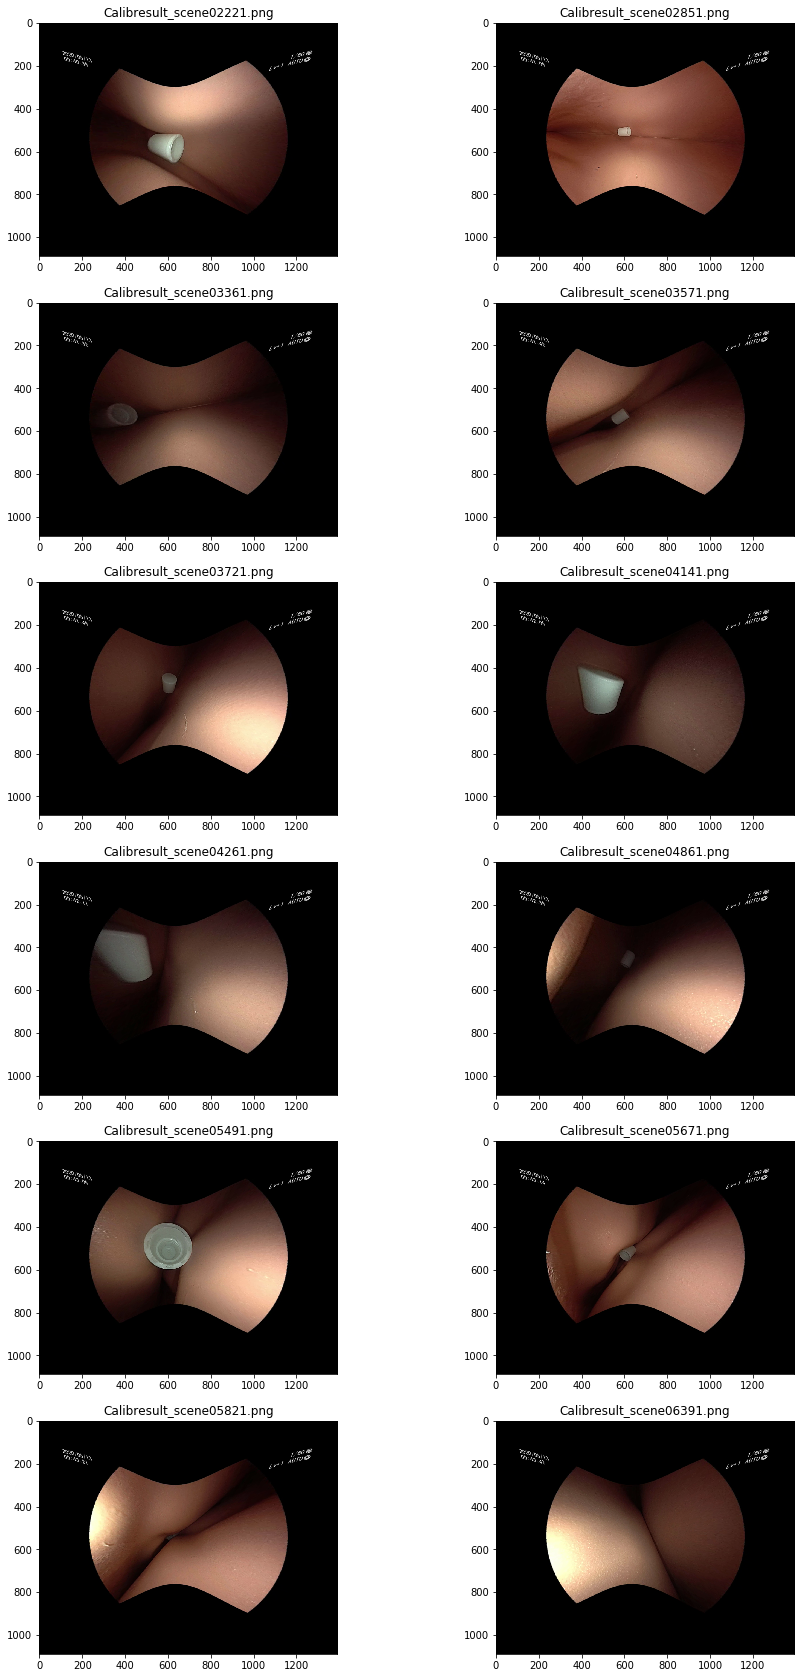

In [27]:
## Hiển thị kết quả sửa méo

### YOUR CODE HERE

....

### YOUR CODE HERE